# Time Series Plots: Before Cleaning vs. After Cleaning

For selected ICU stays, create one figure per vital parameter, each showing a time series plot based on the uncleaned values and one based on the cleaned values.

Accordingly, three figures are generated for each ICU stay:
* Heart rate before and after cleaning
* Blood pressure before and after cleaning
* O2 saturation before and after cleaning

The respective time series are arranged one below the other and share the same x-axis, so that it is easy to compare the time series before and after cleaning.

In [1]:
import pandas as pd
import pyarrow as pa

# Read from parquet file
# chartevents_clean contains both VALUENUM (values before cleaning) and VALUENUM_CLEAN (values after cleaning)
chartevents_clean = pd.read_parquet('../../data/chartevents_clean.parquet', engine='pyarrow')

In [2]:
# Create set of relevant ICUSTAY_IDs to filter by
icustayid_filter = [282496, 277953, 242623, 221376, 200075, 299742, 294140]
# ICU stay examples used in week 6 presentation: 
# ICU stay 282496 → Heart rate
# ICU stay 277953 → Blood pressure
# ICU stay 242623 → Heart rate
# ICU stay 221376 → Blood pressure
# ICU stay 200075 → O2 saturation
# ICU stay 299742 → O2 saturation
# ICU stay 294140 → Heart rate

# Filter by ITEMIDs
plotdata = chartevents_clean[chartevents_clean.ICUSTAY_ID.isin(icustayid_filter)].copy()

In [3]:
import numpy as np

# Add new column with ITEMID_LABEL, which can be used for the legend of the plot
plotdata.insert(loc=len(plotdata.columns), column='ITEMID_LABEL', value=np.nan)

# Heart rate ITEMID_LABELs
plotdata.loc[plotdata['ITEMID'] == 220045, 'ITEMID_LABEL'] = "Measurement"
plotdata.loc[plotdata['ITEMID'] == 220046, 'ITEMID_LABEL'] = "High Threshold"
plotdata.loc[plotdata['ITEMID'] == 220047, 'ITEMID_LABEL'] = "Low Threshold"

# Blood pressure ITEMID_LABELs
plotdata.loc[plotdata['ITEMID'] == 220179, 'ITEMID_LABEL'] = "Measurement"
plotdata.loc[plotdata['ITEMID'] == 223751, 'ITEMID_LABEL'] = "High Threshold"
plotdata.loc[plotdata['ITEMID'] == 223752, 'ITEMID_LABEL'] = "Low Threshold"

# O2 saturation ITEMID_LABELs
plotdata.loc[plotdata['ITEMID'] == 220277, 'ITEMID_LABEL'] = "Measurement"
plotdata.loc[plotdata['ITEMID'] == 223769, 'ITEMID_LABEL'] = "High Threshold"
plotdata.loc[plotdata['ITEMID'] == 223770, 'ITEMID_LABEL'] = "Low Threshold"

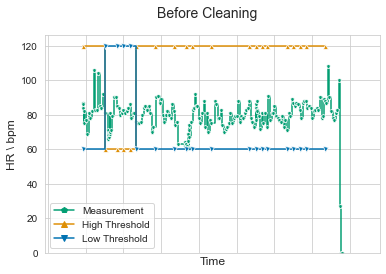

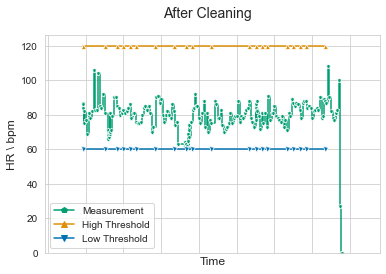

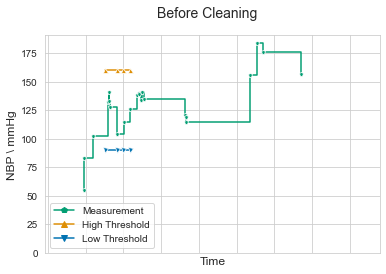

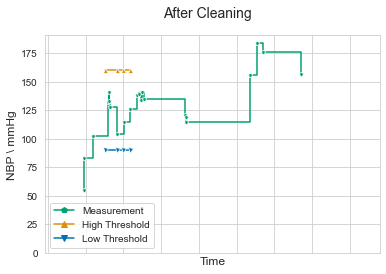

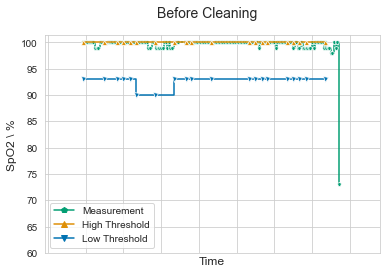

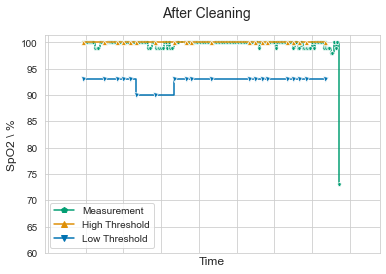

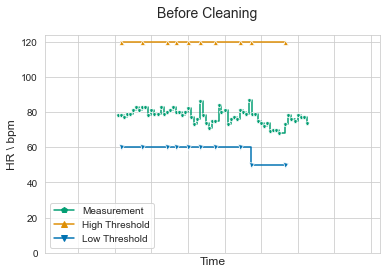

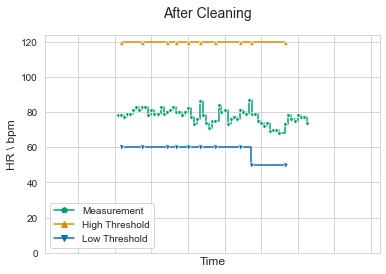

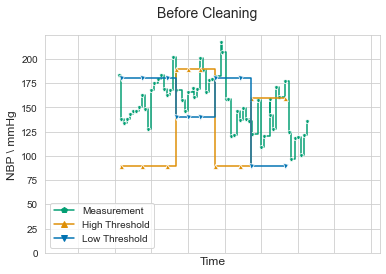

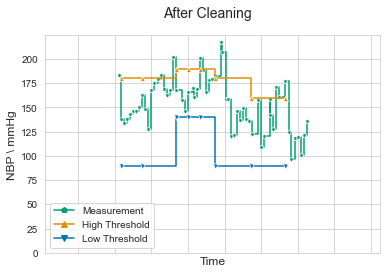

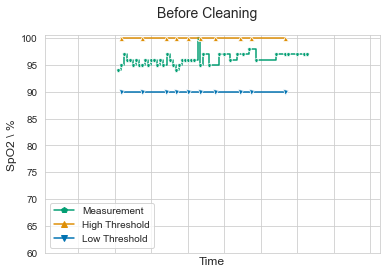

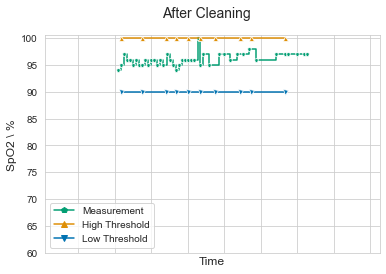

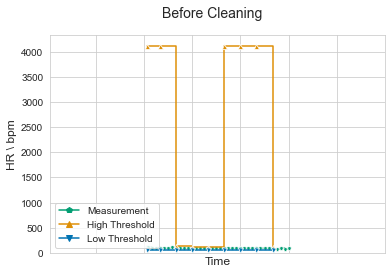

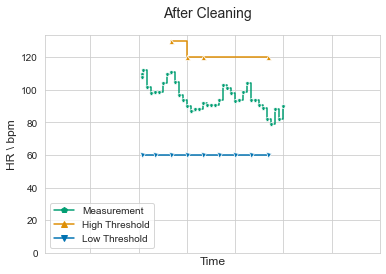

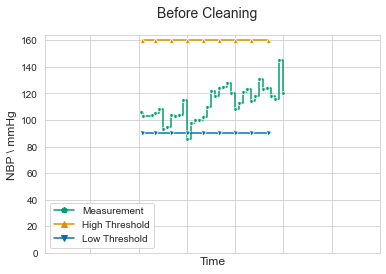

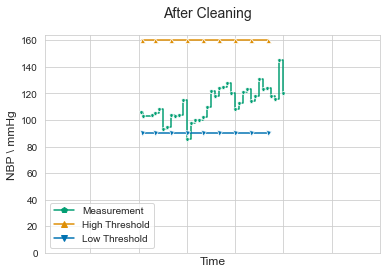

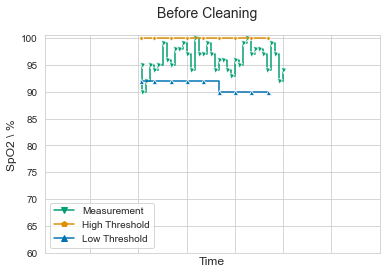

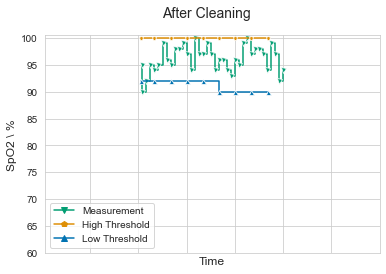

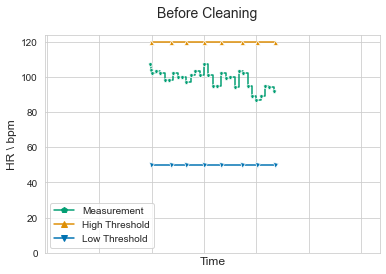

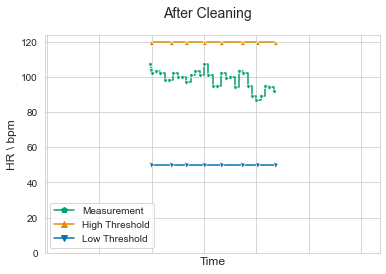

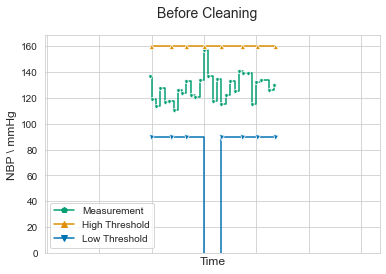

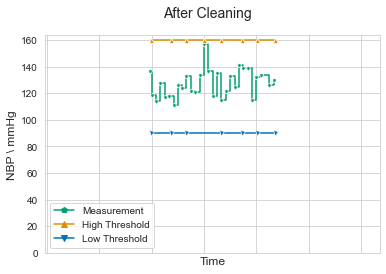

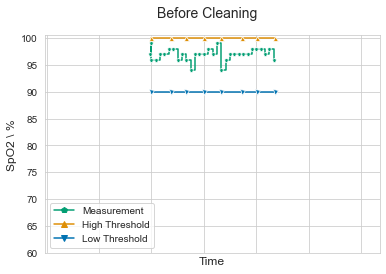

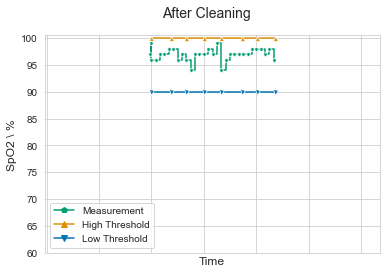

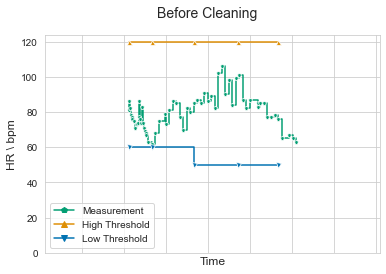

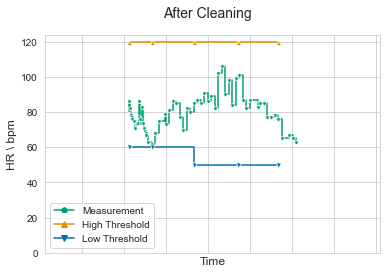

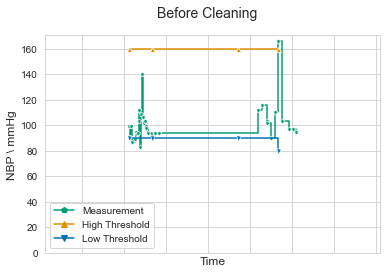

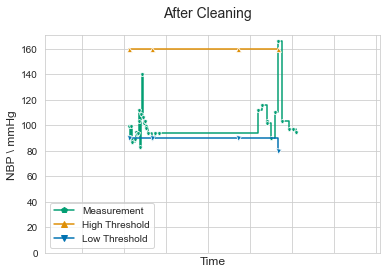

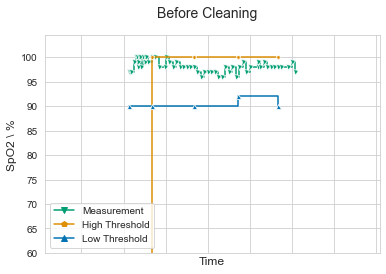

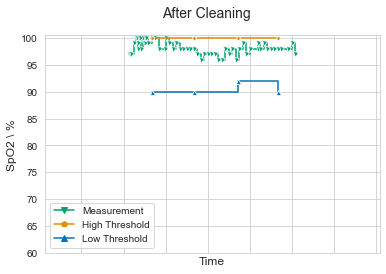

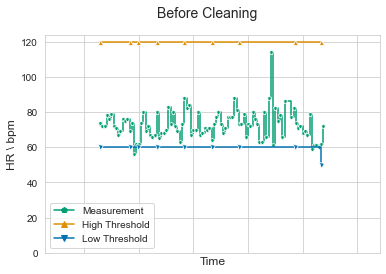

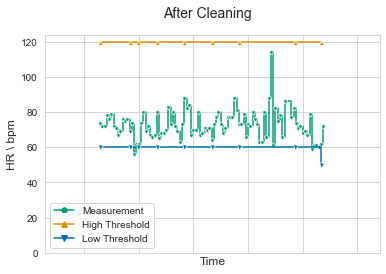

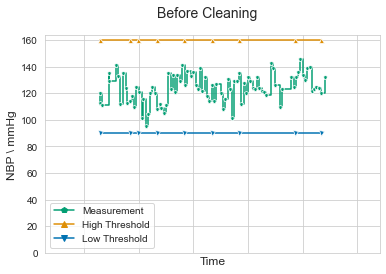

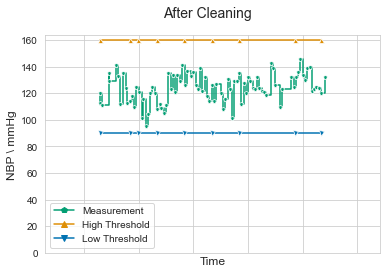

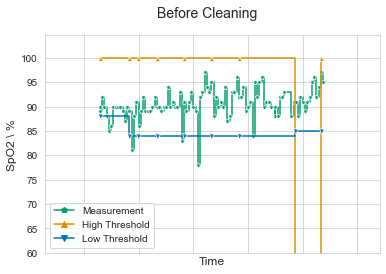

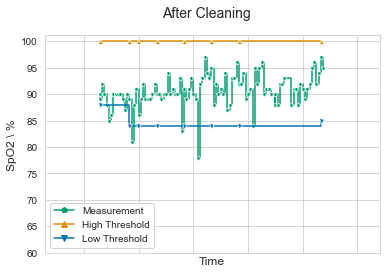

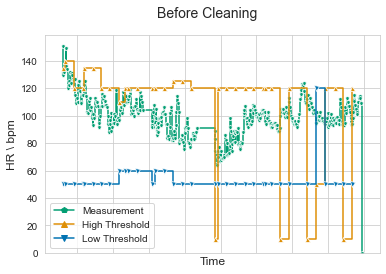

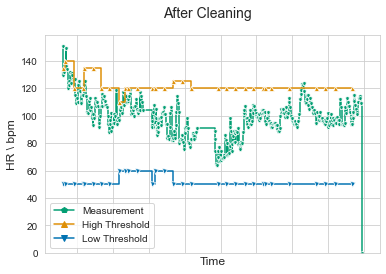

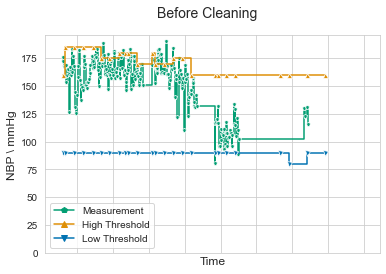

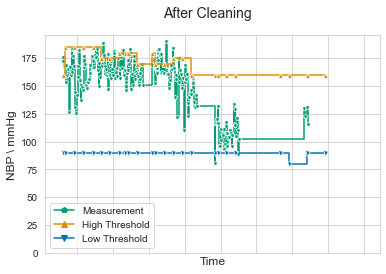

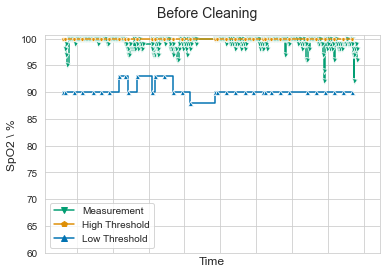

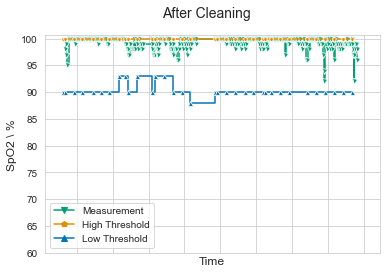

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Path to folder where the figures will be saved as PNGs
path = '../../plots/'

# Set shared variables
sns.set_style("whitegrid")

my_figsize = (6, 4)
my_dpi = 72 # used for display only, DPIs for saved PNGs are set separately

my_x = "CHARTTIME"
my_hue = "ITEMID_LABEL"
my_drawstyle = 'steps-post' # Interpolate missing values by using the last available value
my_markers = ['p','^','v']
my_markersize = 5
my_dashes = False
my_palette = [sns.color_palette("colorblind")[2],sns.color_palette("colorblind")[1],sns.color_palette("colorblind")[0]]
fig_title = "Vital parameter histories before and after data cleaning for ICU stay "
xlabel = "Time"

my_legend_loc = 'lower left'
my_legend_bbox_to_anchor = (0.0, 0.0)

my_title_before = "Before Cleaning"
my_title_after = "After Cleaning"

hr_ylabel = "HR \ bpm"
bp_ylabel = "NBP \ mmHg"
o2_ylabel = "SpO2 \ %"

for icustay in icustayid_filter:

    # Set ICU stay specific variables
    xlimits = [plotdata[plotdata['ICUSTAY_ID'] == icustay].CHARTTIME.min()-pd.Timedelta('1 day'), plotdata[plotdata['ICUSTAY_ID'] == icustay].CHARTTIME.max()+pd.Timedelta('1 day')]

    #########################
    # Heart rate figure before
    #########################

    fig_hr, axs = plt.subplots(1, 1, figsize = my_figsize, dpi = my_dpi)
    fig_hr.suptitle(my_title_before, fontsize=14)

    plotdata_hr = plotdata[(plotdata['ITEMID'].isin([220045,220046,220047])) & (plotdata['ICUSTAY_ID'] == icustay)]
    hue_order_hr = [str(plotdata[plotdata['ITEMID'] == 220045].ITEMID_LABEL.iloc[0]),
                     str(plotdata[plotdata['ITEMID'] == 220046].ITEMID_LABEL.iloc[0]),
                     str(plotdata[plotdata['ITEMID'] == 220047].ITEMID_LABEL.iloc[0])]

    ax = sns.lineplot(
        ax = axs,
        data = plotdata_hr,
        x = my_x,
        y = "VALUENUM",
        hue = my_hue,
        hue_order = hue_order_hr,
        style = my_hue,
        drawstyle = my_drawstyle,
        markers = my_markers,
        markersize = my_markersize,
        dashes = my_dashes,
        palette = my_palette
        )
    
    axs.legend(loc = my_legend_loc, bbox_to_anchor = my_legend_bbox_to_anchor)
    axs.set_xlim(xlimits)
    axs.set_ylim(bottom=0)
    axs.set_xlabel(xlabel, fontsize = 12)
    axs.set_ylabel(hr_ylabel, fontsize = 12)
    axs.tick_params(axis="x", which='both', bottom=False, top=False, labelbottom=False)
    
    plt.savefig(str(path + 'icustay-' + str(icustay) + '_hr' + '_before-cleaning' + '.pdf'))
    plt.show(fig_hr)
    
    #########################
    # Heart rate figure after
    #########################

    fig_hr, axs = plt.subplots(1, 1, figsize = my_figsize, dpi = my_dpi)
    fig_hr.suptitle(my_title_after, fontsize=14)

    plotdata_hr = plotdata[(plotdata['ITEMID'].isin([220045,220046,220047])) & (plotdata['ICUSTAY_ID'] == icustay)]
    hue_order_hr = [str(plotdata[plotdata['ITEMID'] == 220045].ITEMID_LABEL.iloc[0]),
                     str(plotdata[plotdata['ITEMID'] == 220046].ITEMID_LABEL.iloc[0]),
                     str(plotdata[plotdata['ITEMID'] == 220047].ITEMID_LABEL.iloc[0])]

    ax = sns.lineplot(
        ax = axs,
        data = plotdata_hr,
        x = my_x,
        y = "VALUENUM_CLEAN",
        hue = my_hue,
        hue_order = hue_order_hr,
        style = my_hue,
        drawstyle = my_drawstyle,
        markers = my_markers,
        markersize = my_markersize,
        dashes = my_dashes,
        palette = my_palette
        )
    
    axs.legend(loc = my_legend_loc, bbox_to_anchor = my_legend_bbox_to_anchor)
    axs.set_xlim(xlimits)
    axs.set_ylim(bottom=0)
    axs.set_xlabel(xlabel, fontsize = 12)
    axs.set_ylabel(hr_ylabel, fontsize = 12)
    axs.tick_params(axis="x", which='both', bottom=False, top=False, labelbottom=False)
    
    plt.savefig(str(path + 'icustay-' + str(icustay) + '_hr' + '_after-cleaning' + '.pdf'))
    plt.show(fig_hr)
    
    #########################
    # Blood pressure figure before
    #########################

    fig_bp, axs = plt.subplots(1, 1, figsize = my_figsize, dpi = my_dpi)
    fig_bp.suptitle(my_title_before, fontsize=14)

    plotdata_bp = plotdata[(plotdata['ITEMID'].isin([220179,223751,223752])) & (plotdata['ICUSTAY_ID'] == icustay)]
    hue_order_bp = [str(plotdata[plotdata['ITEMID'] == 220179].ITEMID_LABEL.iloc[0]),
                    str(plotdata[plotdata['ITEMID'] == 223751].ITEMID_LABEL.iloc[0]),
                    str(plotdata[plotdata['ITEMID'] == 223752].ITEMID_LABEL.iloc[0])]
    
    ax = sns.lineplot(
        ax = axs,
        data = plotdata_bp,
        x = my_x,
        y = "VALUENUM",
        hue = my_hue,
        hue_order = hue_order_bp,
        style = my_hue,
        drawstyle = my_drawstyle,
        markers = my_markers,
        markersize = my_markersize,
        dashes = my_dashes,
        palette = my_palette
        )
    
    axs.legend(loc = my_legend_loc, bbox_to_anchor = my_legend_bbox_to_anchor)
    axs.set_xlim(xlimits)
    axs.set_ylim(bottom=0)
    axs.set_xlabel(xlabel, fontsize = 12)
    axs.set_ylabel(bp_ylabel, fontsize = 12)
    axs.tick_params(axis="x", which='both', bottom=False, top=False, labelbottom=False)
    
    plt.savefig(str(path + 'icustay-' + str(icustay) + '_nbp' + '_before-cleaning' + '.pdf'))
    plt.show(fig_bp)

    #########################
    # Blood pressure figure after
    #########################

    fig_bp, axs = plt.subplots(1, 1, figsize = my_figsize, dpi = my_dpi)
    fig_bp.suptitle(my_title_after, fontsize=14)

    plotdata_bp = plotdata[(plotdata['ITEMID'].isin([220179,223751,223752])) & (plotdata['ICUSTAY_ID'] == icustay)]
    hue_order_bp = [str(plotdata[plotdata['ITEMID'] == 220179].ITEMID_LABEL.iloc[0]),
                    str(plotdata[plotdata['ITEMID'] == 223751].ITEMID_LABEL.iloc[0]),
                    str(plotdata[plotdata['ITEMID'] == 223752].ITEMID_LABEL.iloc[0])]

    ax = sns.lineplot(
        ax = axs,
        data = plotdata_bp,
        x = my_x,
        y = "VALUENUM_CLEAN",
        hue = my_hue,
        hue_order = hue_order_bp,
        style = my_hue,
        drawstyle = my_drawstyle,
        markers = my_markers,
        markersize = my_markersize,
        dashes = my_dashes,
        palette = my_palette
        )
    
    axs.legend(loc = my_legend_loc, bbox_to_anchor = my_legend_bbox_to_anchor)
    axs.set_xlim(xlimits)
    axs.set_ylim(bottom=0)
    axs.set_xlabel(xlabel, fontsize = 12)
    axs.set_ylabel(bp_ylabel, fontsize = 12)
    axs.tick_params(axis="x", which='both', bottom=False, top=False, labelbottom=False)
    
    plt.savefig(str(path + 'icustay-' + str(icustay) + '_nbp' + '_after-cleaning' + '.pdf'))
    plt.show(fig_bp)
    
    #########################
    # O2 saturation figure before
    #########################
    
    fig_o2, axs = plt.subplots(1, 1, figsize = my_figsize, dpi = my_dpi)
    fig_o2.suptitle(my_title_before, fontsize=14)

    plotdata_bp = plotdata[(plotdata['ITEMID'].isin([220277,223769,223770])) & (plotdata['ICUSTAY_ID'] == icustay)]
    hue_order_bp = [str(plotdata[plotdata['ITEMID'] == 220277].ITEMID_LABEL.iloc[0]),
                    str(plotdata[plotdata['ITEMID'] == 223769].ITEMID_LABEL.iloc[0]),
                    str(plotdata[plotdata['ITEMID'] == 223770].ITEMID_LABEL.iloc[0])]

    ax = sns.lineplot(
        ax = axs,
        data = plotdata_bp,
        x = my_x,
        y = "VALUENUM",
        hue = my_hue,
        hue_order = hue_order_bp,
        style = my_hue,
        drawstyle = my_drawstyle,
        markers = my_markers,
        markersize = my_markersize,
        dashes = my_dashes,
        palette = my_palette
        )

    axs.legend(loc = my_legend_loc, bbox_to_anchor = my_legend_bbox_to_anchor)
    axs.set_xlim(xlimits)
    axs.set_ylim(bottom=60)
    axs.set_xlabel(xlabel, fontsize = 12)
    axs.set_ylabel(o2_ylabel, fontsize = 12)
    axs.tick_params(axis="x", which='both', bottom=False, top=False, labelbottom=False)
    
    plt.savefig(str(path + 'icustay-' + str(icustay) + '_spo2' + '_before-cleaning' + '.pdf'))
    plt.show(fig_o2)
    
    #########################
    # O2 saturation figure after
    #########################

    fig_o2, axs = plt.subplots(1, 1, figsize = my_figsize, dpi = my_dpi)
    fig_o2.suptitle(my_title_after, fontsize=14)

    plotdata_bp = plotdata[(plotdata['ITEMID'].isin([220277,223769,223770])) & (plotdata['ICUSTAY_ID'] == icustay)]
    hue_order_bp = [str(plotdata[plotdata['ITEMID'] == 220277].ITEMID_LABEL.iloc[0]),
                    str(plotdata[plotdata['ITEMID'] == 223769].ITEMID_LABEL.iloc[0]),
                    str(plotdata[plotdata['ITEMID'] == 223770].ITEMID_LABEL.iloc[0])]

    ax = sns.lineplot(
        ax = axs,
        data = plotdata_bp,
        x = my_x,
        y = "VALUENUM_CLEAN",
        hue = my_hue,
        hue_order = hue_order_bp,
        style = my_hue,
        drawstyle = my_drawstyle,
        markers = my_markers,
        markersize = my_markersize,
        dashes = my_dashes,
        palette = my_palette
        )
    
    axs.legend(loc = my_legend_loc, bbox_to_anchor = my_legend_bbox_to_anchor)
    axs.set_xlim(xlimits)
    axs.set_ylim(bottom=60)
    axs.set_xlabel(xlabel, fontsize = 12)
    axs.set_ylabel(o2_ylabel, fontsize = 12)
    axs.tick_params(axis="x", which='both', bottom=False, top=False, labelbottom=False)
    
    plt.savefig(str(path + 'icustay-' + str(icustay) + '_spo2' + '_after-cleaning' + '.pdf'))
    plt.show(fig_o2)